## Plotting and interpreting Learning Curves ##

The learning curve function in the sklearn.model_selection module:

<b>train_sizes, train_scores,validation_scores</b> = <u>learning_curve(estimator = logreg, X=X,y=y,train_sizes=train_sizes,cv=15,scoring='accuracy')</u>

where, train_sizes = number of samples of training data taken each time. e.g [10,15,20,50....] and the learning curves are plotted with these sample sizes as the x-axis.

cv = the number of partions when using k-fold cross validation

estimator = the model used

scoring = performance evaluation metric (accuracy or MSE....etc.)

In [1]:
# Import modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('classification_data.csv') # Read in the data
data.head() # Display the first 5 rows of the data

,Test_1,Test_2,Cancer_Y_N
0,0.295578,1.289804,0
1,0.024831,-0.788522,1
2,0.131159,1.190200,0
3,-0.542544,-0.020009,1
4,0.694037,0.534599,1


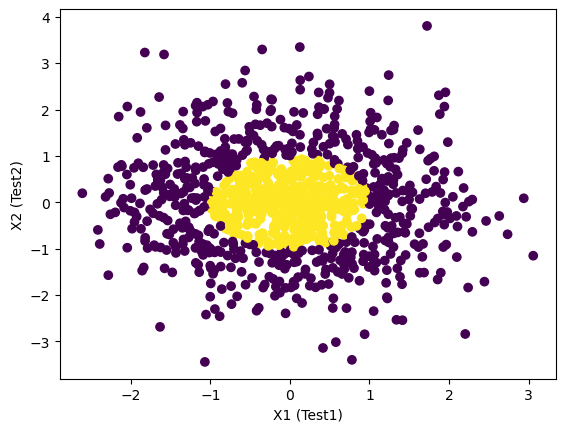

In [3]:
# Plot X (feature columns) vs y (lebel column)

plt.scatter(data['Test_1'],data['Test_2'],c=data['Cancer_Y_N']) # Plot the data
plt.xlabel('X1 (Test1)') # Label the x-axis
plt.ylabel('X2 (Test2)') # Label the y-axis
plt.show() # Display the plot

In [4]:
# Separate X,y
feature_cols = list(data.columns[:-1]) # Get the feature columns (all columns except the last one)

X = data[feature_cols] # Get the feature columns and store them in X
y = data['Cancer_Y_N'] # Get the label column and store it in y
X = X # Convert X to a numpy array

X.shape,y.shape # Display the shape of X and y

((1000, 2), (1000,))

In [5]:
print(f"1 and 0s:\n{y.value_counts()}") # Display the count of 1s and 0s

1 and 0s:
Cancer_Y_N
0    597
1    403
Name: count, dtype: int64


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42) # Split the data
print(X_train.shape,y_test.shape) # Display the shape of the training and test sets
print(f"\n1s and 0s in test set:\n{y_test.value_counts()}") # Display the count of 1s and 0s in the test set

(850, 2) (150,)

1s and 0s in test set:
Cancer_Y_N
0    92
1    58
Name: count, dtype: int64


In [7]:
# Instantiate regression object

logreg = LogisticRegression() # Instantiate the logistic regression object
logreg.fit(X_train,y_train) # Fit the model

y_pred = logreg.predict(X_test) # Predict the test set

print(f"Accuracy: {accuracy_score(y_pred,y_test)*100}%") # Display the accuracy
print(f"Confusion Matrix:\n{confusion_matrix(y_pred,y_test)}") # Display the confusion matrix
# Top Left: True Positive
# Top Right: False Positive
# Bottom Left: False Negative
# Bottom Right: True Negative

Accuracy: 61.33333333333333%
Confusion Matrix:
[[92 58]
 [ 0  0]]


[-0.38084374] [[ 0.01149127 -0.01917902]]
[33.14202055] [-19.85731155]


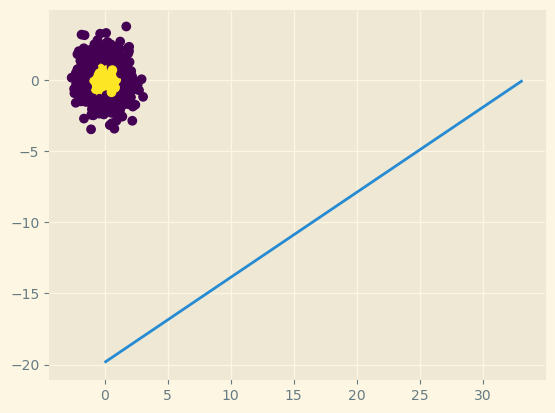

In [19]:
# plot Decision Boundary to see how the fit is
# theta0 + theta1*x1 + theta2*x2 >= 0 for y = 1
print(logreg.intercept_,logreg.coef_) # Display the intercept and coefficients

# Formulate the equations and get the two coordinates
x1 = -logreg.intercept_/logreg.coef_[0][0] # When x2=0
x2 = -logreg.intercept_/logreg.coef_[0][1] # When x1=0
print(x1,x2) # Display the two coordinates

plt.scatter(X['Test_1'],X['Test_2'],c=y) # Plot the data
plt.plot([np.squeeze(x1),0],[0,np.squeeze(x2)]) # Plot the decision boundary
plt.show() # Display the plot

# Pushes the model to teh top left so everything is one category to maximize accuracy
# Logistic regression seperates 2 classes by straight lines, but there is no strait line that can seperate the data, which is not good

In [9]:
# Plot learning curves for cv = 15

train_sizes = [50,100,300,500,700] # Creating the sample sizes to feed

# Prepare to plot the learning curves for the new data set using cv = 15
# Feed the logistic regression model into the estimator parameter
# Feed the different sample sizes into the train_sizes parameter, where it tests 50 then 100 and so on
# k-fold cross validation is 15: For every sample of data, so first 50, we will build a model and check it over 15 partitions, then it will move to the next sample of 100 and do the same thing until 700
train_sizes, train_scores, validation_scores = learning_curve(
estimator = logreg,
X= X,
y= y, train_sizes = train_sizes, cv = 15,
scoring = 'accuracy') # Use accuracy as the scoring metric

In [10]:
# Print average accuracy for train and validation data per cv iteration
# Should have 5 brackets corresponding to the 5 sample sizes
# Should have 15 accuracy scores for each sample size corresponding to the 15 partitions from cv

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation/Testing scores:\n\n', validation_scores)

Training scores:

 [[0.52       0.56       0.56       0.56       0.56       0.56
  0.56       0.56       0.56       0.56       0.56       0.56
  0.56       0.56       0.56      ]
 [0.64       0.64       0.52       0.52       0.52       0.52
  0.52       0.52       0.52       0.52       0.52       0.52
  0.52       0.52       0.52      ]
 [0.61333333 0.61333333 0.61333333 0.61333333 0.61333333 0.61
  0.61       0.61       0.61       0.61       0.61       0.61
  0.61       0.61       0.61      ]
 [0.616      0.616      0.616      0.616      0.616      0.616
  0.616      0.616      0.612      0.612      0.612      0.612
  0.612      0.612      0.612     ]
 [0.60428571 0.60428571 0.60428571 0.60428571 0.60428571 0.60428571
  0.60428571 0.60428571 0.60428571 0.60428571 0.60428571 0.6
  0.6        0.6        0.6       ]]

 ----------------------------------------------------------------------

Validation/Testing scores:

 [[0.52238806 0.52238806 0.35820896 0.34328358 0.41791045 0.56716418
  

In [11]:
# Store the mean values of accuracy per iteration
# Relfects the model that we built as nothing seems to be greater than 61%

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation/testing scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 50     0.557333
100    0.536000
300    0.611111
500    0.614133
700    0.603143
dtype: float64

 --------------------

Mean validation/testing scores

 50     0.442967
100    0.478969
300    0.597000
500    0.597000
700    0.597000
dtype: float64


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


(0.0, 1.0)

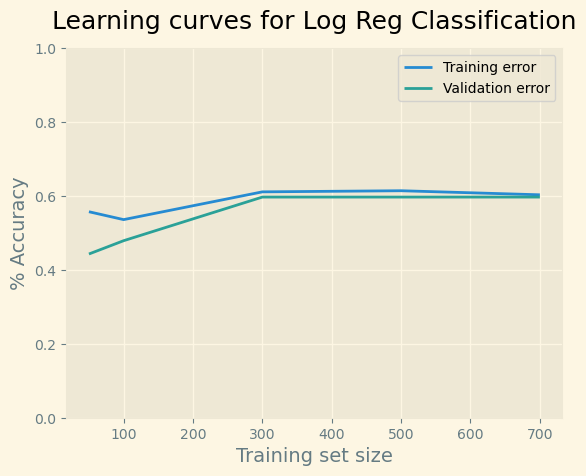

In [17]:
# Plot learning curves
# Two curves have converged: tells us that adding any more data will not improve accuracy
# To improve accuracy (reduce bias), we need to use a more complex model or add more features
# Since the plot shous out features produce an oval shape, we need a polynomial decision boundary

print(plt.style.available) # Display the available styles
plt.style.use('Solarize_Light2') # Use the Solarize_Light2 style
plt.plot(train_sizes, train_scores_mean, label = 'Training error') # Plot the training error
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error') # Plot the validation error
plt.ylabel('% Accuracy', fontsize = 14) # Label the y-axis
plt.xlabel('Training set size', fontsize = 14) # Label the x-axis
plt.title('Learning curves for Log Reg Classification', fontsize = 18, y = 1.03) # Title the plot
plt.legend() # Display the legend
plt.ylim(0,1) # Set the y-axis limits

#### What does the training curve tell us? ####
1. What action should we take?

Answers
1. Bias is high and variance is low
2. The data is already converging, so adding data has no value. 
3. We either need to do some feature engineering or add a new measurement to the dataset



In [13]:
# Lets add some polynomial features (Feature Engineering)

from sklearn.preprocessing import PolynomialFeatures

In [14]:
# Let us now add polynomial features after instantiating an object to do the same
# degree=2: if there is a test1, create a feature called test1^2, if there is test2, create a feature called test2^2, and so on
# intereaction_only=False: if there is test1 and test2, do not create a feature called test1*test2
# include_bias=False: do not include a column of x0 --> 1s in the data

poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
X_new = poly.fit_transform(X)

print(f"New X:\n{X_new[:5]}")

New X:
[[ 2.95577774e-01  1.28980437e+00  8.73662205e-02  3.81237503e-01
   1.66359530e+00]
 [ 2.48313740e-02 -7.88522054e-01  6.16597135e-04 -1.95800860e-02
   6.21767030e-01]
 [ 1.31159293e-01  1.19019993e+00  1.72027601e-02  1.56105782e-01
   1.41657588e+00]
 [-5.42543870e-01 -2.00090420e-02  2.94353851e-01  1.08557831e-02
   4.00361762e-04]
 [ 6.94037007e-01  5.34598760e-01  4.81687367e-01  3.71031323e-01
   2.85795834e-01]]


In [15]:
# Let us build a another logistic regression model with the new X
# Now there are only 3 missclassifications for false negatives

logreg1 = LogisticRegression()

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,y,test_size=0.15,random_state=42)

logreg1.fit(X_train1[:,2:5],y_train1)
y_hat = logreg1.predict(X_test1[:,2:5]).reshape(-1,1)
print(y_hat.shape,X_test1[:,2:5].shape)
print(f"Accuracy: {accuracy_score(y_hat,y_test1)*100}%")
print(f"Confusion Matrix:\n{confusion_matrix(y_hat,y_test1)}")

(150, 1) (150, 3)
Accuracy: 98.0%
Confusion Matrix:
[[89  0]
 [ 3 58]]
